타이타닉 생존자 예측 모델

In [2]:
# 데이터 로드
import pandas as pd

df_train = pd.read_csv("train.csv")
df_train.head(3)

df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# EDA (Exploratory Data Analysis) 데이터 탐험 
print(df_train.columns) # train
print(df_test.columns) # test

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [5]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [6]:
# null
print(df_train.isna().sum())
print(df_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [12]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.Collecting seaborn
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 656.4 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 819.2 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 952.6 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 958.4 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 901.1 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 930.9 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 912.4 kB/s eta 0:00:00




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
%pip install spicy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import seaborn as sns

<Axes: xlabel='Pclass'>

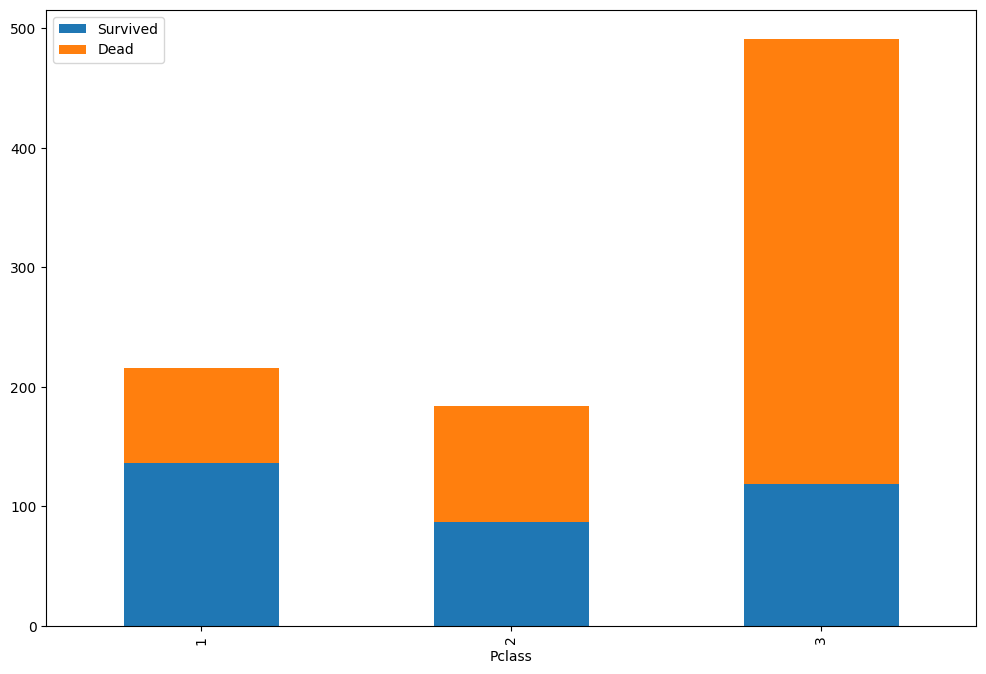

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


df_train[df_train["Survived"] == 1]["Pclass"]

survived = df_train[df_train["Survived"] == 1]["Pclass"].value_counts()
dead = df_train[df_train["Survived"] == 0]["Pclass"].value_counts()

df_merged = pd.DataFrame({"Survived":survived, "Dead": dead})
df_merged.plot(kind="bar", stacked=True, figsize=(12,8))

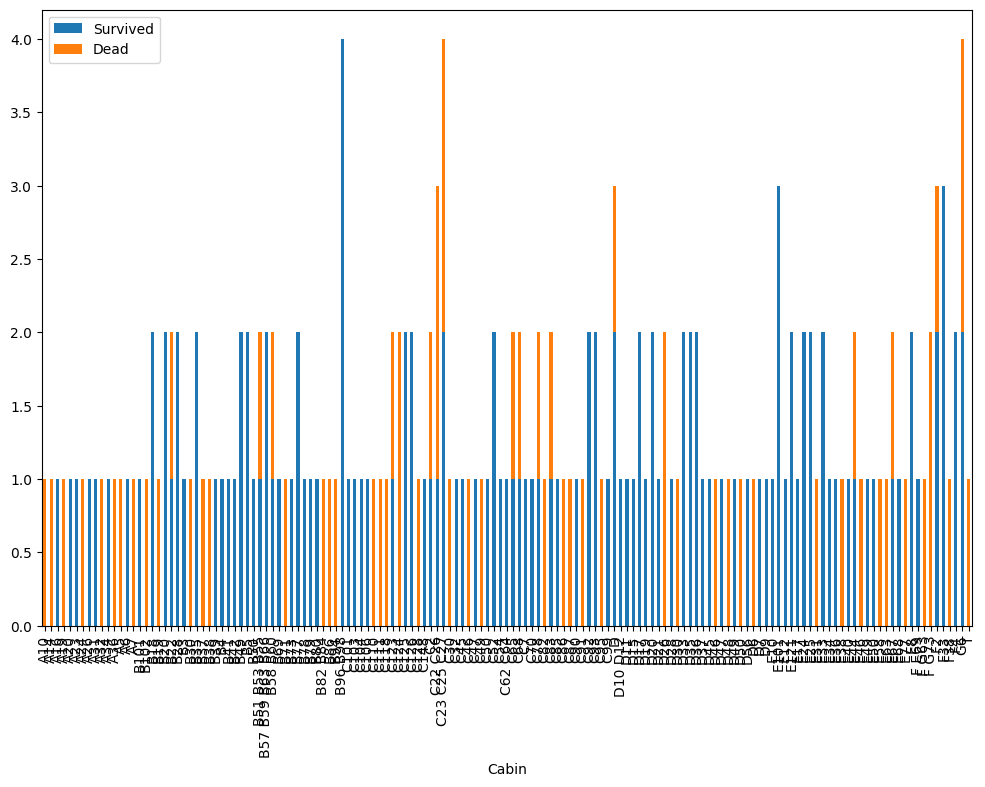

In [17]:
def bar_chart(column_name):
    survived = df_train[df_train["Survived"] == 1][column_name].value_counts()
    dead = df_train[df_train["Survived"] == 0][column_name].value_counts()

    df_merged = pd.DataFrame({"Survived":survived, "Dead": dead})
    df_merged.plot(kind="bar", stacked=True, figsize=(12,8))

bar_chart("Cabin")

In [19]:
# 가장 많은 요금을 낸 상위 10명의 생존율은 어떻게 될까요?
# df_train.sort_values(by="Fare", ascending=False).head(10)[["Survived", "Fare"]] # Fare : 요금에 따라서 정렬
# head(5) 상위 5명 || tail(5) 하위 5명
df_train.sort_values(by="Fare", ascending=False).head(10)[["Survived", "Fare"]].value_counts()

Survived  Fare    
1         512.3292    3
0         263.0000    2
1         262.3750    2
          263.0000    2
0         247.5208    1
Name: count, dtype: int64

In [20]:
df_train[["Name","Survived"]]

,Name,Survived
0,"Braund, Mr. Owen Harris",0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
2,"Heikkinen, Miss. Laina",1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
4,"Allen, Mr. William Henry",0
...,...,...
886,"Montvila, Rev. Juozas",0
887,"Graham, Miss. Margaret Edith",1
888,"Johnston, Miss. Catherine Helen ""Carrie""",0
889,"Behr, Mr. Karl Howell",1


In [21]:
train_test_data = [df_train, df_test]

for data in train_test_data:
    data["Name"] = data["Name"].str.extract(" ([A-Za-z]+)\. ")

In [22]:
df_train["Name"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [23]:
name_mapping = {
    "Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 4, "Rev": 5
}

for data in train_test_data:
    data["Name"] = data["Name"].map(name_mapping)

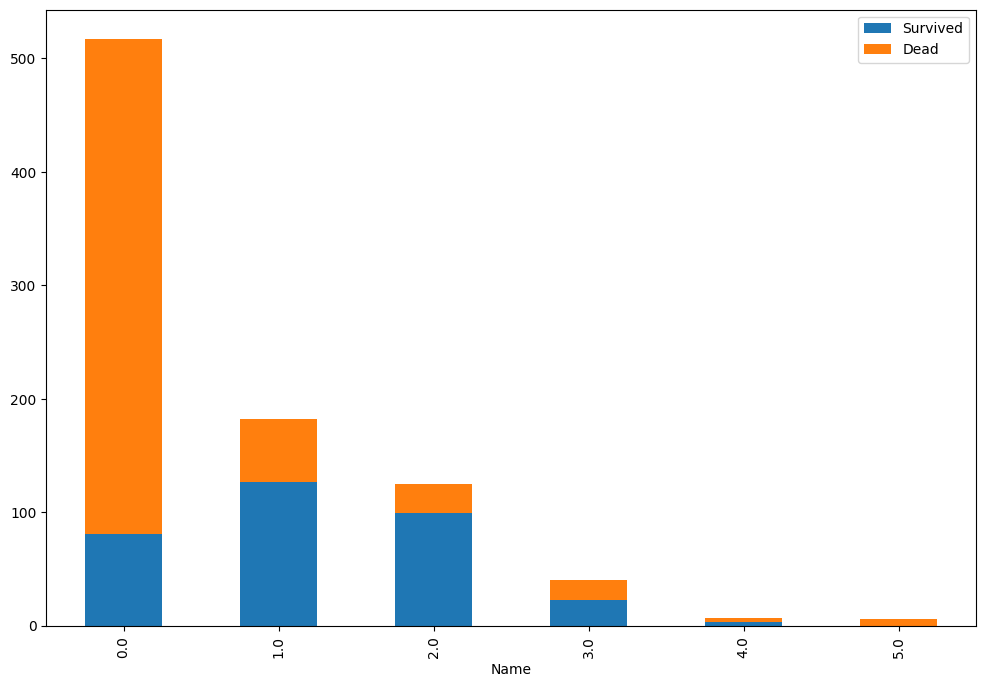

In [24]:
df_train["Name"].value_counts()
bar_chart("Name")

In [25]:
df_train["Sex"] = df_train["Sex"].replace({"male":0, "female":1})
df_test["Sex"] = df_test["Sex"].replace({"male":0, "female":1})

C:\Users\jaese\AppData\Local\Temp\ipykernel_17540\3321595014.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["Sex"] = df_train["Sex"].replace({"male":0, "female":1})
C:\Users\jaese\AppData\Local\Temp\ipykernel_17540\3321595014.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test["Sex"] = df_test["Sex"].replace({"male":0, "female":1})


In [26]:
df_train["Sex"].value_counts()
df_test["Sex"].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [27]:
df_train["Age"].isna().sum()

177

In [28]:
df_train.groupby("Name")["Age"].mean()

Name
0.0    32.368090
1.0    21.773973
2.0    35.898148
3.0     4.574167
4.0    42.000000
5.0    43.166667
Name: Age, dtype: float64

In [29]:
df_train["Age"].fillna(df_train.groupby("Name")["Age"].transform("mean"), inplace=True)
df_test["Age"].fillna(df_test.groupby("Name")["Age"].transform("mean"), inplace=True)

C:\Users\jaese\AppData\Local\Temp\ipykernel_17540\1868204814.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train["Age"].fillna(df_train.groupby("Name")["Age"].transform("mean"), inplace=True)
C:\Users\jaese\AppData\Local\Temp\ipykernel_17540\1868204814.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [30]:
df_train["Age"].isna().sum()

0

In [31]:
df_test["Age"].isna().sum()

1

In [33]:
df_test["Age"].fillna(df_test["Age"].mean(), inplace=True) # Nan인 부분을 변경
df_test["Age"].isna().sum() # null 데이터 갯수 확인

C:\Users\jaese\AppData\Local\Temp\ipykernel_17540\1512633781.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Age"].fillna(df_test["Age"].mean(), inplace=True) # Nan인 부분을 변경


0

In [35]:
df_train["Age"].value_counts()
df_train["Age"].isna().sum()

0

In [36]:
import numpy as np

age_bins = [0, 16, 32, 50, 100]
age_labels = [0, 1, 2, 3]

for data in train_test_data:
    data["Age"] = pd.cut(data["Age"], bins=age_bins, labels=age_labels)

df_train["Age"].value_counts()

Age
1    382
2    341
0    104
3     64
Name: count, dtype: int64

In [37]:
for data in train_test_data:
    data["Family"] = data["SibSp"] + data["Parch"] + 1

In [38]:
df_train["Fare"].isna().sum()

fare_bins = [0, 20, 100, 1000]
fare_labels = [0, 1, 2]

for test in train_test_data:
    data["Fare"] = pd.cut(data["Fare"], bins=fare_bins, labels=fare_labels)

df_train["Fare"].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [40]:
df_train["Embarked"] = df_train["Embarked"].replace({"S":0, "C":1, "Q":2})
df_test["Embarked"] = df_train["Embarked"].replace({"S":0, "C":1, "Q":2})

df_test["Age"].fillna(0, inplace=True)
df_test["Age"].isna().sum()

df_train["Embarked"].value_counts()

df_train["Embarked"].fillna(0, inplace=True)
df_test["Embarked"].fillna(0, inplace=True)

df_train["Embarked"].isna().sum()
df_test["Embarked"].isna().sum()

C:\Users\jaese\AppData\Local\Temp\ipykernel_17540\3042782797.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test["Age"].fillna(0, inplace=True)
C:\Users\jaese\AppData\Local\Temp\ipykernel_17540\3042782797.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

0

In [41]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,0.0,0,1,1,0,A/5 21171,7.2500,NaN,0.0,2
1,2,1,1,2.0,1,2,1,0,PC 17599,71.2833,C85,1.0,2
2,3,1,3,1.0,1,1,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1
3,4,1,1,2.0,1,2,1,0,113803,53.1000,C123,0.0,2
4,5,0,3,0.0,0,2,0,0,373450,8.0500,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,5.0,0,1,0,0,211536,13.0000,NaN,0.0,1
887,888,1,1,1.0,1,1,0,0,112053,30.0000,B42,0.0,1
888,889,0,3,1.0,1,1,1,2,W./C. 6607,23.4500,NaN,0.0,4
889,890,1,1,0.0,0,1,0,0,111369,30.0000,C148,1.0,1


In [42]:
drop_train_cols = ["PassengerId", "SibSp", "Parch", "Ticket", "Cabin"]

df_train_final = df_train.drop(drop_train_cols, axis=1)
df_train_final

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,0,3,0.0,0,1,7.2500,0.0,2
1,1,1,2.0,1,2,71.2833,1.0,2
2,1,3,1.0,1,1,7.9250,0.0,1
3,1,1,2.0,1,2,53.1000,0.0,2
4,0,3,0.0,0,2,8.0500,0.0,1
...,...,...,...,...,...,...,...,...
886,0,2,5.0,0,1,13.0000,0.0,1
887,1,1,1.0,1,1,30.0000,0.0,1
888,0,3,1.0,1,1,23.4500,0.0,4
889,1,1,0.0,0,1,30.0000,1.0,1


In [43]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,892,3,0.0,0,2,0,0,330911,NaN,NaN,0.0,1
1,893,3,2.0,1,2,1,0,363272,NaN,NaN,1.0,2
2,894,2,0.0,0,3,0,0,240276,NaN,NaN,0.0,1
3,895,3,0.0,0,1,0,0,315154,NaN,NaN,0.0,1
4,896,3,2.0,1,1,1,1,3101298,NaN,NaN,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.0,0,1,0,0,A.5. 3236,NaN,NaN,0.0,1
414,1306,1,NaN,1,2,0,0,PC 17758,0,C105,0.0,1
415,1307,3,0.0,0,2,0,0,SOTON/O.Q. 3101262,NaN,NaN,0.0,1
416,1308,3,0.0,0,1,0,0,359309,NaN,NaN,0.0,1


In [44]:
drop_test_cols = ["SibSp", "Parch", "Ticket", "Cabin"]

df_test_final = df_test.drop(drop_test_cols, axis=1)
df_test_final

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Family
0,892,3,0.0,0,2,NaN,0.0,1
1,893,3,2.0,1,2,NaN,1.0,2
2,894,2,0.0,0,3,NaN,0.0,1
3,895,3,0.0,0,1,NaN,0.0,1
4,896,3,2.0,1,1,NaN,0.0,3
...,...,...,...,...,...,...,...,...
413,1305,3,0.0,0,1,NaN,0.0,1
414,1306,1,NaN,1,2,0,0.0,1
415,1307,3,0.0,0,2,NaN,0.0,1
416,1308,3,0.0,0,1,NaN,0.0,1


모델링

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [47]:
features = df_train_final.drop("Survived", axis=1)
labels = df_train_final["Survived"]

df_train_final.fillna(0, inplace=True)
df_train_final.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [48]:
df_train_final.fillna(0, inplace=True)
df_train_final.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [49]:
df_test_final.fillna(0, inplace=True)
df_test_final.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
dtype: int64

In [51]:
# kfold
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
dt_clf = DecisionTreeClassifier()
scores = cross_val_score(dt_clf, features, labels, cv=kfold, scoring="accuracy")

print(np.mean(scores)*100)

nan


c:\Users\jaese\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jaese\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jaese\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\Users\jaese\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", 